# POST GRADUATE PROGRAM IN DATA SCIENCE AND ENGINEERING JANUARY 2023 - ONLINE

# Domain : Predictive Analytics in the field of Transportation/ Urban Mobility

# GROUP 8 : Analysis on Yellow Taxis and Congessions in the Newyork City

<b>Presented by:</b>
* Keren Melinda V</br>
* Lakshmi Priya</br>
* Liviya Sekar</br>
* Ritartha Chakraborty</br>
* Sriram S</br> 

<b>Led by Sriram S</b></br>
<b>Mentored by Mohit Sahu</b></br>

<b>Problem Statement</b></br>

One of the major issues faced by the population of New York is the traffic congestion in the city during the rush hours which in week days falls between 07-10 hrs and 16-20hrs. The rush hours in weekends will vary based on major events happening in the city such concerts, major sporting events etc. As per the tom tom traffic index, due to the congestion average ride hour exceeds by approx. 12-17 minutes. This is a major problem which needs attention and right intervention.

<b>Data Collection</b></br>
The data is extracted from the Newyork Taxi & Limousine Commission website - https://www.nyc.gov/site/tlc/index.page. The data contains 32,88,250 rows and 19 columns including vendorID, ratecodeID, payment type, passenger count, pickup datetime, dropoff datetime, and fare details etc., which were collected for the month of April 2023. The additional data which consists of borough, zone and service zone details of new york city.

<b>Data Description</b></br>
<i><b>VendorID</i></b> - A code indicating the TPEP provider that provided the record. (1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.)</br>
<i><b>tpep_pickup_datetime</i></b> - The date and time when the meter was engaged.</br>
<i><b>tpep_dropoff_datetime</i></b> - The date and time when the meter was disengaged.</br> 
<i><b>Passenger_count</i></b> - The number of passengers in the vehicle. This is a driver-entered value.</br>
<i><b>Trip_distance</i></b> - The elapsed trip distance in miles reported by the taximeter.</br>
<i><b>PULocationID</i></b> - TLC Taxi Zone in which the taximeter was engaged.</br>
<i><b>DOLocationID</i></b> - TLC Taxi Zone in which the taximeter was disengaged.</br>
<i><b>RateCodeID</i></b> - The final rate code in effect at the end of the trip. (1= Standard rate, 2=JFK, 3=Newark, 4=Nassau or Westchester, 5=Negotiated fare, 6=Group ride)</br>
<i><b>Store_and_fwd_flag</i></b> - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.(Y= store and forward trip, N= not a store and forward trip)</br>
<i><b>Payment_type</i></b> - A numeric code signifying how the passenger paid for the trip. (1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown, 6= Voided trip)</br>
<i><b>Fare_amount</i></b> - The time-and-distance fare calculated by the meter.</br>
<i><b>Extra</i></b> - Miscellaneous extras and surcharges. Currently, this only includes the $0.50 and $1 rush hour and vernight charges.</br>
<i><b>MTA_tax</i></b> - \\$0.50 MTA tax that is automatically triggered based on the metered rate in use. </br>
<i><b>Improvement_surcharge</i></b> - \\$0.30 improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015.</br>
<i><b>Tip_amount</i></b> - This field is automatically populated for credit card tips. Cash tips are not included.</br>
<i><b>Tolls_amount</i></b> - Total amount of all tolls paid in trip.</br>
<i><b>Total_amount</i></b> - The total amount charged to passengers. Does not include cash tips.</br>
<i><b>Congestion_Surcharge</i></b> - Total amount collected in trip for NYS congestion surcharge. </br>
<i><b>Airport_fee</i></b> - $1.25 for pick up only at LaGuardia and John F. Kennedy Airports.</br>

<b>Data Exploration</b>

In [2]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

from scipy import stats

<b>Importing the raw data</b>

In [3]:
# importing parquet file of APR 2023 yellow taxi dataset
# Since raw data is in parquet format installing pyarrow for data conversion and high efficiency

# !{sys.executable} -m pip install pyarrow 
#parquet_file = 'yellow_tripdata_2023-04.parquet'
#df = pd.read_parquet(parquet_file) # reading the parquet file

# Specify the output CSV file name
#csv_output = 'yellow_taxi_cab.csv'

# Save the DataFrame to the CSV file using tab as the separator and excluding the index column
#df.to_csv(csv_output, index=False, sep='\t')

#df.head() #  display the firt five rows

In [5]:
# Reading the Raw dataset
df = pd.read_csv('yellow_taxi_cab.csv', sep='\t')

<b>Importing additional data to support the analysis</b>

In [6]:
# to merge lookup location ids
locations= pd.read_csv('taxi+_zone_lookup.csv') # importing additional data

df = df.merge(locations,how='left',left_on='PULocationID',right_on='LocationID')
df = df.rename(columns={'Borough':'PU_Borough','Zone':'PU_Zone','service_zone':'PU_service_zone'})
df.drop(columns='LocationID',inplace = True)
df = df.merge(locations,how='left',left_on='DOLocationID',right_on='LocationID')
df = df.rename(columns={'Borough':'DO_Borough','Zone':'DO_Zone','service_zone':'DO_service_zone'})
df.drop(columns='LocationID',inplace = True)

In [7]:
# shape of raw data
df.shape

(3288250, 25)

The dataset contains 32,88,250 rows and 25 columns.

In [10]:
# checking for missing/null values
count = df.isna().sum() 
percent = count/len(df)*100

missing_df = pd.concat((count, percent), axis = 1, keys = ['count', 'percent'])

missing_df

count   percent
VendorID                   0  0.000000
tpep_pickup_datetime       0  0.000000
tpep_dropoff_datetime      0  0.000000
passenger_count        90690  2.758002
trip_distance              0  0.000000
RatecodeID             90690  2.758002
store_and_fwd_flag     90690  2.758002
PULocationID               0  0.000000
DOLocationID               0  0.000000
payment_type               0  0.000000
fare_amount                0  0.000000
extra                      0  0.000000
mta_tax                    0  0.000000
tip_amount                 0  0.000000
tolls_amount               0  0.000000
improvement_surcharge      0  0.000000
total_amount               0  0.000000
congestion_surcharge   90690  2.758002
Airport_fee            90690  2.758002
PU_Borough                 0  0.000000
PU_Zone                 2160  0.065688
PU_service_zone        36145  1.099217
DO_Borough                 0  0.000000
DO_Zone                13082  0.397841
DO_service_zone        51612  1.569589

In [12]:
# checking datatype of the columns
df.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
Airport_fee              float64
PU_Borough                object
PU_Zone                   object
PU_service_zone           object
DO_Borough                object
DO_Zone                   object
DO_service_zone           object
dtype: object

<b>Data Cleaning</b>

<b>Dropping missing values</b>

In [16]:
# DROPPING THE NULL VALUES
df = df.dropna()

In [17]:
# df shape after removing null values
df.shape

(3143655, 25)

1,44,595 rows which contained null values were removed from the dataframe.

<b>Datatype Conversion</b>

In [13]:
# date time dtype conversion
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [18]:
# Dtype conversion
df['VendorID']=df['VendorID'].astype(object)
df['passenger_count']=df['passenger_count'].astype(int)
df['RatecodeID']=df['RatecodeID'].astype(object)
df['payment_type']=df['payment_type'].astype(object)

In [19]:
# checking datatype of the columns after dtype conversion
df.dtypes

VendorID                         object
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int32
trip_distance                   float64
RatecodeID                       object
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                     object
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
PU_Borough                       object
PU_Zone                          object
PU_service_zone                  object
DO_Borough                       object
DO_Zone                          object
DO_service_zone                  object


<b>Data Filtration</b></br>
Filter the data corresponding to weekday rush hours.

In [20]:
# Filtering the first fortnight
df = df[(df['tpep_pickup_datetime'].dt.day <= 14) & (df['tpep_dropoff_datetime'].dt.day <= 14)]

In [21]:
# Filtering only the rush hours 
df= df[df['tpep_pickup_datetime'].dt.hour.between(7,9) | df['tpep_pickup_datetime'].dt.hour.between(16,19)]

In [22]:
# Removing the weekends from dataframe
dates= [1,2,8,9,15,16]
df= (df[(~df['tpep_pickup_datetime'].dt.day.isin(dates))  & (~df['tpep_dropoff_datetime'].dt.day.isin(dates))])

In [23]:
# Removing the May month rows
df = df[(df['tpep_pickup_datetime'].dt.month == 4) & (df['tpep_dropoff_datetime'].dt.month == 4)]

In [24]:
# shape after data filtration
df.shape

(404642, 25)

<b>Feature Extraction</b></br>
Creating seven new features such as trip_duration_secs, pickup_date, dropoff_date, pickup_hour, drop_hour, pickup_day, dropoff_day.

In [25]:
# extracting trip duration in seconds
df['trip_duration_secs'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

# extracting pickup date
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date  

# extracting dropoff date
df['dropoff_date'] = df['tpep_dropoff_datetime'].dt.date  

# extracting pickup hour
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour 

# extracting drop off hour
df['drop_hour']=df['tpep_dropoff_datetime'].dt.hour  

# extracting pickup day
df['pickup_day']=df['tpep_pickup_datetime'].dt.day_name() 

# extracting drop off day
df['dropoff_day']=df['tpep_dropoff_datetime'].dt.day_name() 

<b>Data Preprocessing</b>

In [45]:
# dropping 63 rows which has 0 total amount
df = df[df['total_amount'] != 0] 

# dropping 3361 rows which has negative total amount
df = df[df['total_amount'] > 0] 

# dropping 7593 rows which has 0 passenger count
df = df[df['passenger_count'] != 0] 

# dropping 2731 rows which has incorrect ratecodeID (99)
df = df[df['RatecodeID'] != 99] 

# dropping 3893 rows which has 0 trip distance
df = df[df['trip_distance'] != 0] 

# dropping 3501 rows which has fare amount less than 3
df = df[df['fare_amount'] >= 3] 

# dropping 238 rows which has 0 improvement surcharge
df = df[df['improvement_surcharge'] != 0] 

# dropping the unknown locations Id rows
df = df[~((df['PULocationID'].isin([264,265])) | (df['DOLocationID'].isin([264,265])))]

# passge count 8 anomaly is removed
df.drop(df[df['passenger_count']==8].index,inplace=True)

# dropping 3742 rows with  trip duration less than 60secs
df=df[df['trip_duration_secs']>60]

# trip duration cannot exceed more than 10 hrs as per the nyc limits
df.drop(df[df['trip_duration_secs']> 36000].index,inplace=True) # dropping 255 rows

# the max distance would be around 2o mile while will take an average duration of about min 45 to max 1h:30 min
# hence we are dropping 293 trips got droppped off around 12 am which is an anomaly
df.drop(df[df['tpep_pickup_datetime'].dt.date != df['tpep_dropoff_datetime'].dt.date].index, inplace=True)

# dropping 43 rows with more than 10000 secs with congestion surcharge 0
df.drop(df[(df['trip_duration_secs'] > 10000) & (df['congestion_surcharge'] == 0)].index, inplace=True)

# dropping 5 rows with more than 1000 miles
df.drop(df[df['trip_distance'] >1000].index, inplace=True)

# (5 sec, 0.05 miles, 300 fare) ,(0.18,24,fare-890),(0.38,82,350),(0.38,56704,664.5,same pickup and drop)  rows can be dropped
df.drop(index=df[(df.fare_amount== 300) & (df.trip_distance== 0.05) & (df.trip_duration_secs== 5)].index,inplace=True)
df.drop(index=df[(df.fare_amount== 890) & (df.trip_distance== 0.18) & (df.trip_duration_secs== 24)].index,inplace=True)
df.drop(index=df[(df.fare_amount== 350) & (df.trip_distance== 0.38) & (df.trip_duration_secs== 82)].index,inplace=True)
df.drop(index=df[(df.fare_amount== 664.5) & (df.trip_distance== 0.38) & (df.trip_duration_secs== 56704)].index,inplace=True)

# For same PU and DO locations where location id 132 on 159 rows the fare is 70 which is flat rate from 132 to manhattan 
# therefore these rows can be dropped as we are not sure of the desination.
df.drop(index=df[(df['PULocationID']==132) & (df['DOLocationID']==132) & (df['fare_amount']==70)].index,inplace=True)

#improvement surcharge
#where improvement surcharge is 0 (262)
#250 '0' in congestion surcharge
#236 '0' in trip distance
#7 '0' passengers
#68 '0' fare amounts
#254 '0' mta tax
# so these can be dropped (as there were no discernable pattern)
df.drop(index = df[df['improvement_surcharge'] == 0].index, inplace = True)


In [46]:
#shape of data after cleaning
df.shape

(386411, 32)

In [47]:
#where improvement surcharge in 0.3(162)
# other things seem to be normal and nothing is discernable
#this can be considered as a mistake of wrong collection by the driver and can be imputed
# also, even if some pattern pattern is hidden the 162 rows is miniscule to say whether it is not a coincidence
df['improvement_surcharge'] = np.where((df['improvement_surcharge'] == 0.3), 1, df['improvement_surcharge'])

In [48]:
# Column extra
# we observed for vendor Id 1, the congestion surcharge and the airport fee were being added in extras. 
# we subtracted the amount in extras 
df['extra'] = np.where(df['VendorID']==1,df['extra']-df['congestion_surcharge']-df['Airport_fee'],df['extra'])

# After that for extras we still see that are values other than 2.50,0.0,7.5,5.0(correct values for extras)
# There are 1418(rows) other values which seem to be anomaly 
# There are few rows with anomaly so it can be dropped 
df=df[df['extra'].isin([2.50,0.00,5.00,7.50])]

In [49]:
# Imputing mta tax with 0.5 where there were 0
df['mta_tax']=np.where(df['mta_tax']==0,0.5,df['mta_tax'])

In [50]:
# column fare amount
#two fares for ratecode id 2 are 69.5 and 78.25 - can be imputed to 70 (flat rate)
df['fare_amount']=np.where((df.RatecodeID==2) & (df.fare_amount.isin([69.50,78.25])),70.0,df.fare_amount)

In [51]:
#below have congestion surcharge as 2.5
#if the pickup starts from airport(132/138/70) and the drop off is in the same Borough(Queens) impute it with zero.
#if the pickup starts from airport(132/138/70) and the drop off is in the Borough Brooklyn impute it with zero.
#no imputation required for pickup starting from airport(132/138/70) and the drop off is in the Borough Bronx
#any pick up and drop locations within the same borough with less and medium level trip distance can be imputed with 0
#any pick up and drop locations between different boroughs with with less trip distance can be imputed with 0

df['congestion_surcharge']=np.where(((df.congestion_surcharge==2.5) & (df.PULocationID.isin([132,138,70])) & (df.DO_Borough=='Queens') & (df.trip_distance<30)), 0, df.congestion_surcharge)
df['congestion_surcharge']=np.where(((df.congestion_surcharge==2.5) & (df.PULocationID.isin([132,138,70])) & (df.DO_Borough=='Brooklyn')), 0, df.congestion_surcharge)
df['congestion_surcharge']= np.where(((df.congestion_surcharge==2.5) & (df['PU_Borough'] == df['DO_Borough']) & (df['PU_Borough']!='Manhattan') & (df['DO_Borough']!='Manhattan') & (df['trip_distance'] <5)),0,df['congestion_surcharge'])
df['congestion_surcharge']= np.where(((df.congestion_surcharge==2.5) & (df['PU_Borough'] != df['DO_Borough']) & (df['PU_Borough']!='Manhattan') & (df['DO_Borough']!='Manhattan') & (df['trip_distance'] <1)),0,df['congestion_surcharge'])


In [52]:
#changing the tips in the cash amount to 0, as the column will only consist of tips made using other modes of payment
df['tip_amount']=np.where(((df.payment_type == 2) & (df.tip_amount!= 0)),0,df.tip_amount)

In [53]:
#Airport_fee

#started from manhattan - 10 are 70 dollars fare - these might have been between the jfk airport and manhattan
df.drop(index= df[(df['Airport_fee']==1.25) & (df.PU_Borough=='Manhattan') & (df.fare_amount==70)].index,inplace=True)

#other 6 are much far from the jfk and lagaurdia - airport fee can be imputed with 0
df['Airport_fee']=np.where(((df['Airport_fee']==1.25) & (df.PU_Borough=='Manhattan') & (df.fare_amount!=70)),0,df['Airport_fee'])

#other occurances where the trip is not starting from 132,138,70 can be imputed with 0
df['Airport_fee']=np.where(((df['Airport_fee']==1.25) & ~(df['PULocationID'].isin([132,138,70]))),0,df['Airport_fee'])

#all the other occurances where the trip is starting from 132,138,70 can be imputed with 1.75
df['Airport_fee']=np.where(((df['Airport_fee']==1.25) & (df['PULocationID'].isin([132,138,70]))),1.75,df['Airport_fee'])

In [54]:
#imputing wrong values present for vendor id 2 in total_amount
df['total_check']= np.round(df.fare_amount+df.extra+df.mta_tax+df.tip_amount+df.tolls_amount+df.improvement_surcharge+df.congestion_surcharge+df.Airport_fee,2)
df['difference']= np.round(df['total_check']-df['total_amount'],2)
df['total_amount'] = np.where(((df.difference!=0)),df.total_check,df.total_amount)

<b>Dropping Insignificant Features</b>

In [55]:
#dropping the Total check Column
df = df.drop('total_check', axis=1)

#dropping the difference Column
df = df.drop('difference', axis=1)

In [56]:
# filtering only week 1 data for further analysis
week1 = [3,4,5,6,7]
hours = [16,17,18,19]
taxidf1 = df[(df['tpep_pickup_datetime'].dt.day.isin(week1)) & (df['tpep_pickup_datetime'].dt.hour.isin(hours))]
taxidf1.shape

(132030, 32)

<b>Outlier Detection</B>

In [57]:
df_num = taxidf1.select_dtypes(include='number')

# Check for outliers using descriptive statistics
# Calculate the 25th (Q1) and 75th (Q3) percentiles
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = (df_num < lower_bound) | (df_num > upper_bound)

# Print the columns with outliers
print("Columns with outliers:")
print(outliers.any())

Columns with outliers:
passenger_count           True
trip_distance             True
PULocationID             False
DOLocationID             False
fare_amount               True
extra                     True
mta_tax                  False
tip_amount                True
tolls_amount              True
improvement_surcharge    False
total_amount              True
congestion_surcharge      True
Airport_fee               True
trip_duration_secs        True
pickup_hour              False
drop_hour                False
dtype: bool


In [58]:
numerical_columns = taxidf1.select_dtypes(include='number')

# Check for outliers using descriptive statistics
# Calculate the 25th (Q1) and 75th (Q3) percentiles
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Check for outliers
outliers = (numerical_columns < lower_bound) | (numerical_columns > upper_bound)

# Print information about potential outliers in each numerical column
print("Outlier Information:")
for col in outliers.columns:
    num_outliers = outliers[col].sum()
    total_values = len(outliers)
    percentage_outliers = (num_outliers / total_values) * 100
    print(f"{col}: {num_outliers} outliers ({percentage_outliers:.2f}% of total)")

Outlier Information:
passenger_count: 32470 outliers (24.59% of total)
trip_distance: 16320 outliers (12.36% of total)
PULocationID: 0 outliers (0.00% of total)
DOLocationID: 0 outliers (0.00% of total)
fare_amount: 13773 outliers (10.43% of total)
extra: 11885 outliers (9.00% of total)
mta_tax: 0 outliers (0.00% of total)
tip_amount: 8457 outliers (6.41% of total)
tolls_amount: 9459 outliers (7.16% of total)
improvement_surcharge: 0 outliers (0.00% of total)
total_amount: 14426 outliers (10.93% of total)
congestion_surcharge: 6929 outliers (5.25% of total)
Airport_fee: 10383 outliers (7.86% of total)
trip_duration_secs: 9371 outliers (7.10% of total)
pickup_hour: 0 outliers (0.00% of total)
drop_hour: 0 outliers (0.00% of total)


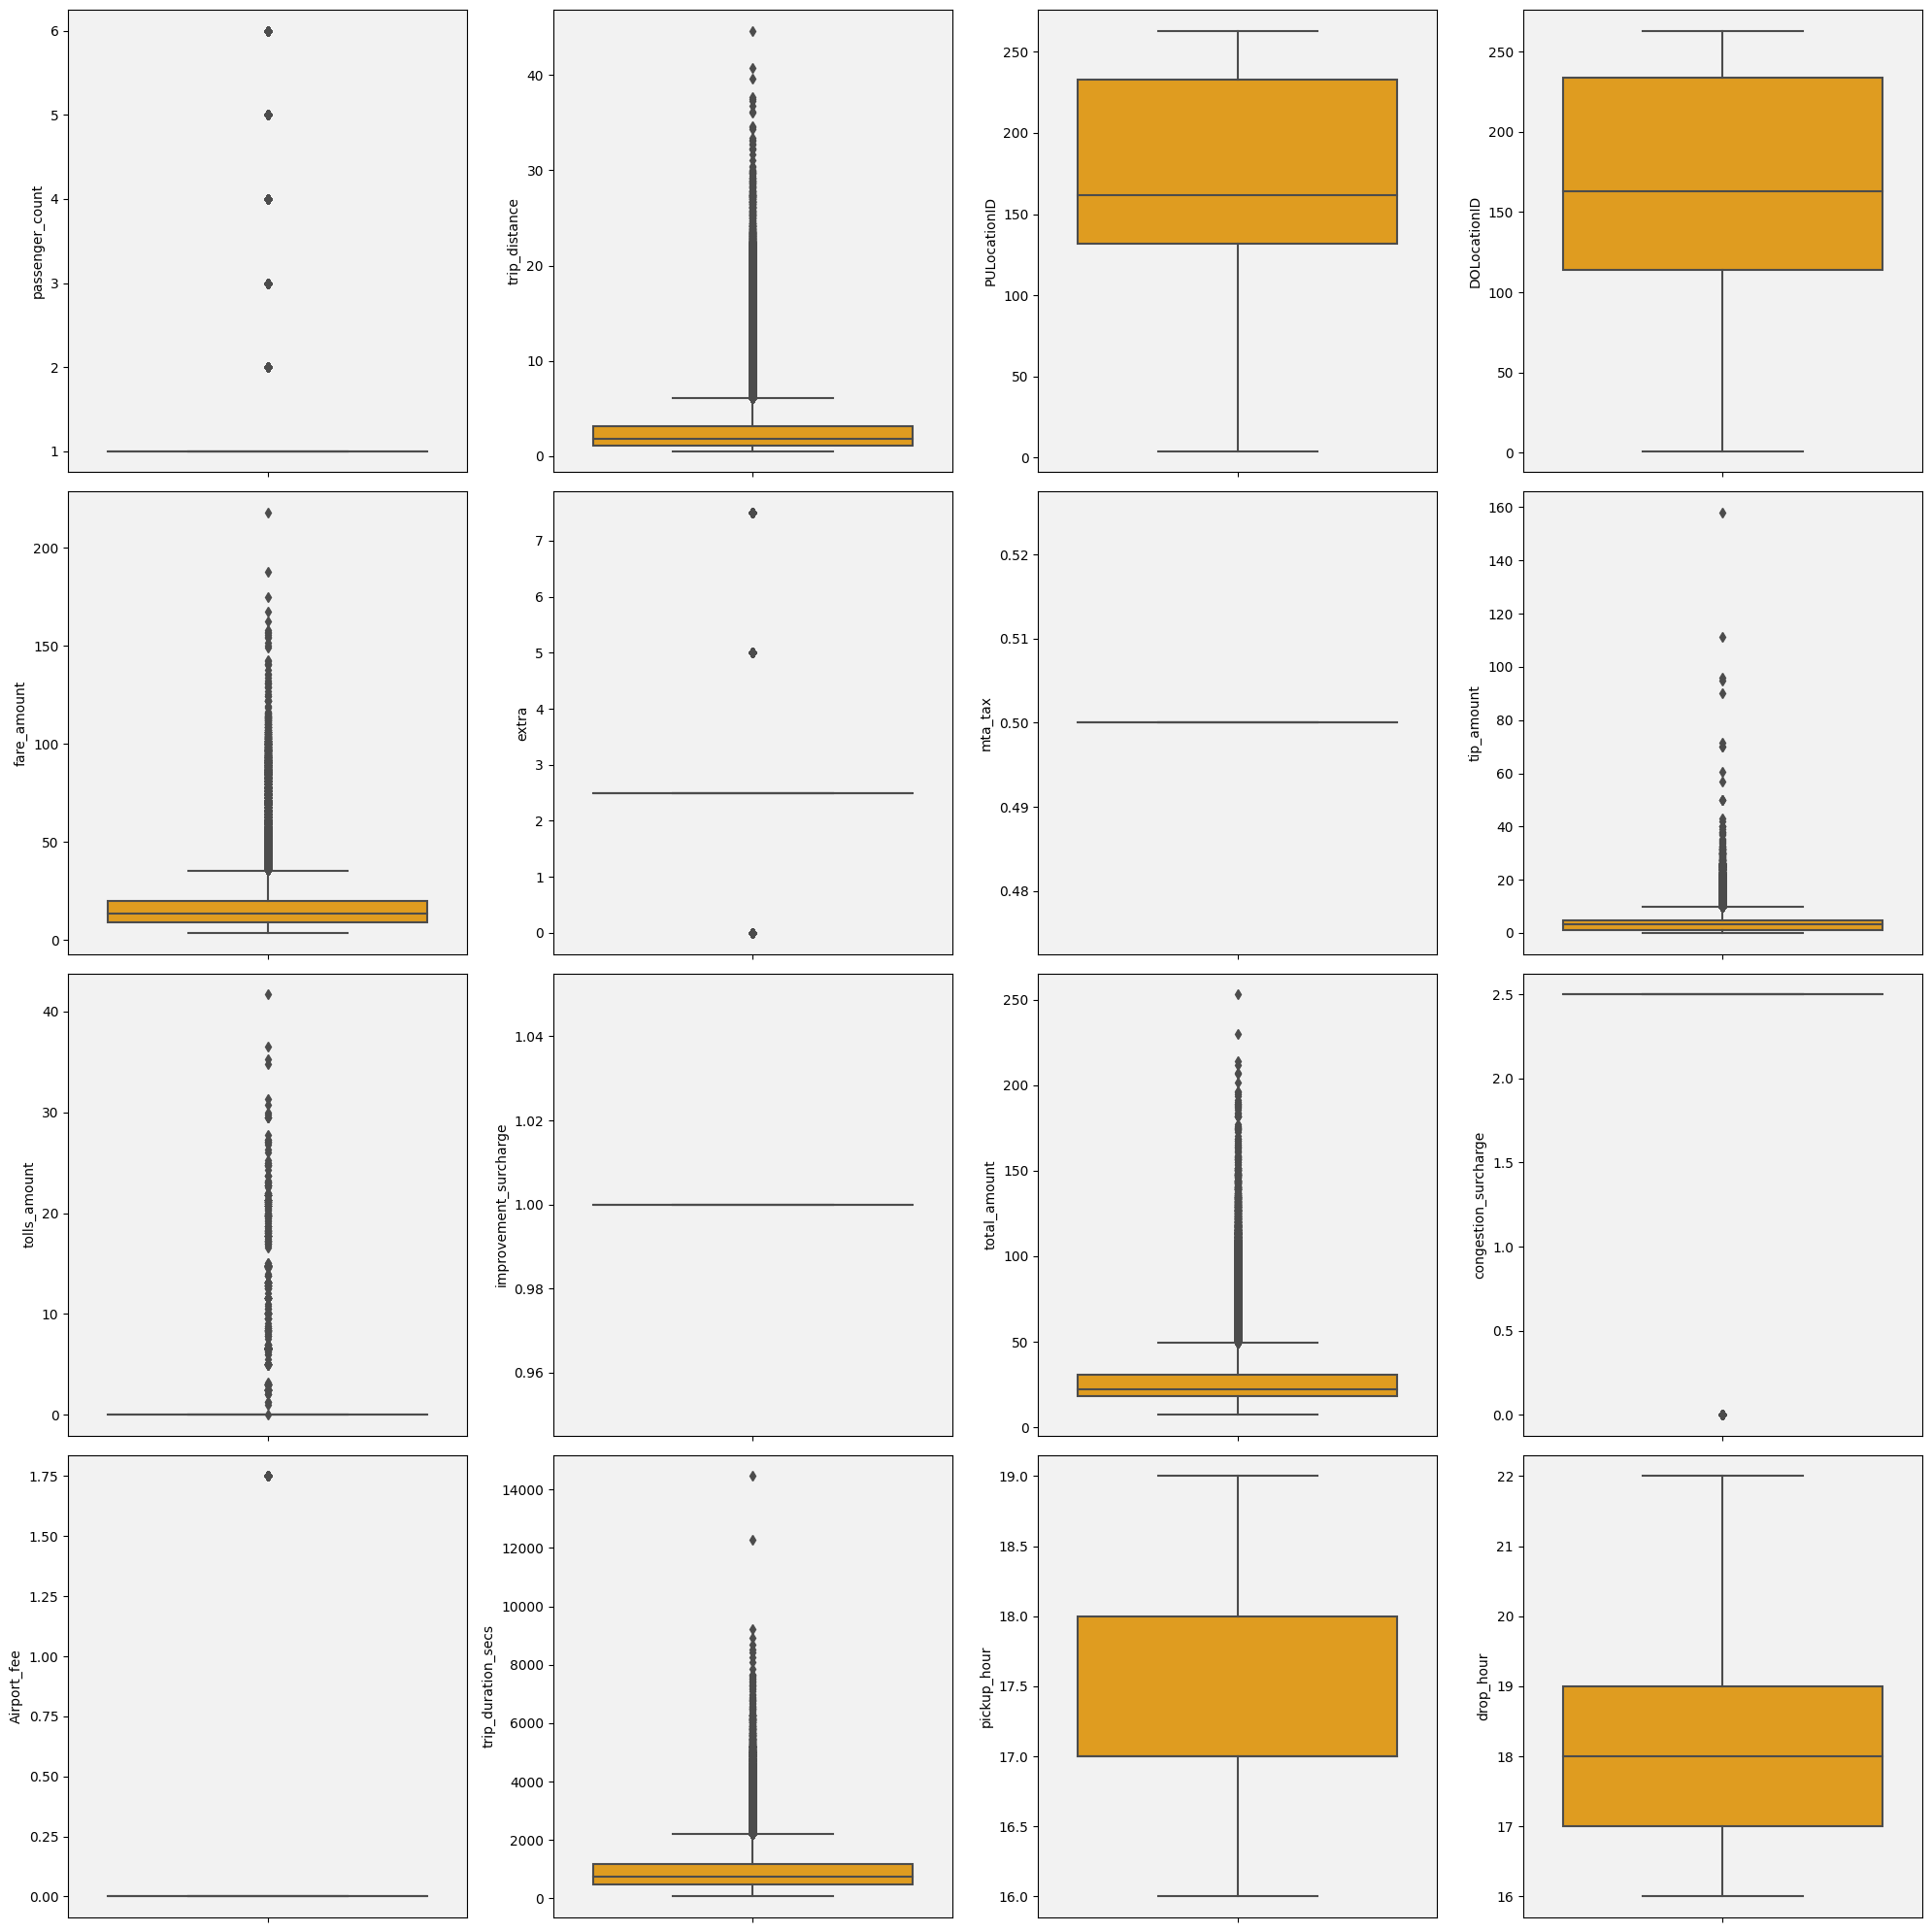

In [74]:
# boxplot for visualising outliers

fig, ax= plt.subplots(4,4, figsize=(20,20))
for i,j in zip(range(len(df.select_dtypes(include='number').columns)), ax.flatten()):
    sns.boxplot(y=df.select_dtypes(include='number').iloc[:,i],ax=j,orient='v', color = 'orange')
    j.set_facecolor("#F2F2F2")
plt.tight_layout()
plt.show()

In [ ]:
# the boxplot confirms the presence of outlier in all columns
# except location ids, mta tax and improvement surcharge
# lets find the most irrelevant outliers and impute/remove those values for further analysis

In [60]:
# dropping insignificant rows 
df = taxidf1.drop(taxidf1[taxidf1["trip_distance"]<=0.5].index, axis=0)
taxidf1.drop(taxidf1[(taxidf1["trip_duration_secs"]>5000) & (taxidf1["trip_distance"]<10)].index,axis=0,inplace=True)

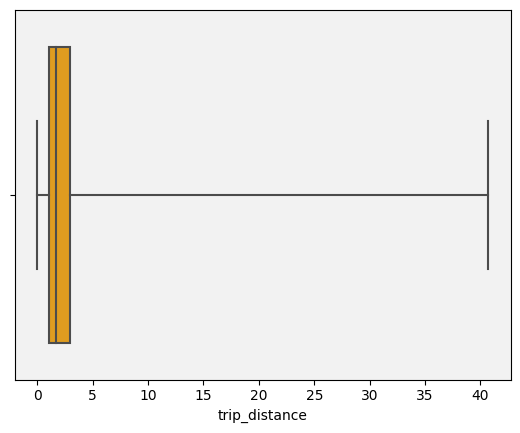

In [80]:
# outlier analysis
# trip_distance
ax = plt.axes()
 
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")
sns.boxplot(x = taxidf1['trip_distance'],whis= 20, color = 'orange')
plt.savefig('my_plot.png', transparent=True)

In [66]:
# dropping extreme outliers

taxidf1 = taxidf1[taxidf1["trip_distance"] <= 43]

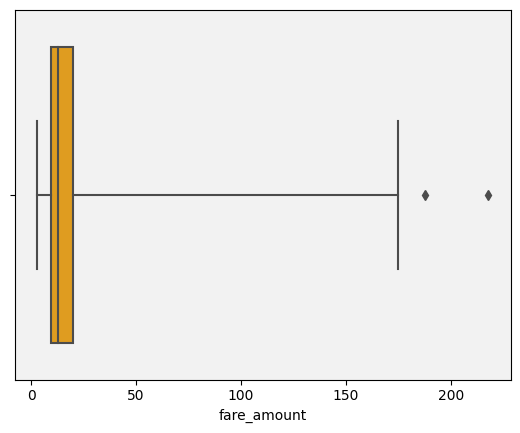

In [78]:
# fare amount
ax = plt.axes()
ax.set_facecolor("#F2F2F2")
sns.boxplot(x = taxidf1['fare_amount'], whis=15, color = 'orange')
plt.show()

In [81]:
Q1 = taxidf1["fare_amount"].quantile(0.25)
Q3 = taxidf1["fare_amount"].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 15 * IQR
upper_bound = Q3 + 15 * IQR

In [82]:
# checking for outliers present above upper bound
taxidf1[taxidf1["fare_amount"] > upper_bound]

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
606797        2  2023-04-06 19:10:35   2023-04-06 20:07:30                3   
689134        2  2023-04-07 16:43:55   2023-04-07 17:33:17                1   

        trip_distance RatecodeID store_and_fwd_flag  PULocationID  \
606797          40.71        4.0                  N           132   
689134          36.11        4.0                  N           226   

        DOLocationID payment_type  fare_amount  extra  mta_tax  tip_amount  \
606797             1            1        187.8    2.5      0.5        15.0   
689134             1            1        217.9    2.5      0.5         0.0   

        tolls_amount  improvement_surcharge  total_amount  \
606797          21.3                    1.0        229.85   
689134          31.3                    1.0        253.20   

        congestion_surcharge  Airport_fee PU_Borough      PU_Zone  \
606797                   0.0         1.75     Queens  JFK Airport   
689134                   0.0         0.00     Queens    Sunnyside   

       PU_service_zone DO_Borough         DO_Zone DO_service_zone  \
606797        Airports        EWR  Newark Airport             EWR   
689134       Boro Zone        EWR  Newark Airport             EWR   

        trip_duration_secs pickup_date dropoff_date  pickup_hour  drop_hour  \
606797              3415.0  2023-04-06   2023-04-06           19         20   
689134              2962.0  2023-04-07   2023-04-07           16         17   

       pickup_day dropoff_day  
606797   Thursday    Thursday  
689134     Friday      Friday

In [83]:
# dropping extreme outliers for fare amount
taxidf1 = taxidf1[taxidf1["fare_amount"] < upper_bound]

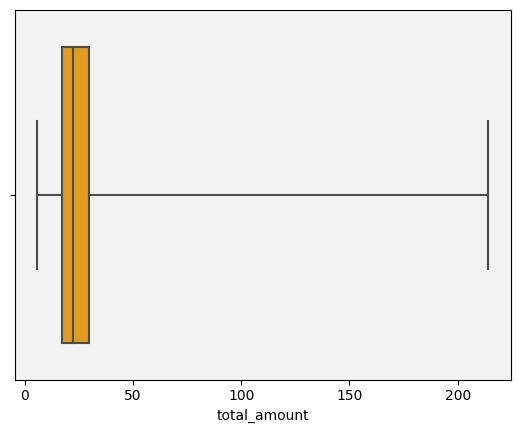

In [85]:
# total_amount
ax = plt.axes()
 
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")
sns.boxplot(x = taxidf1["total_amount"], whis=15, color='orange')
plt.savefig('my_plot.png', transparent=True)

In [86]:
Q1 =taxidf1["total_amount"].quantile(0.25)
Q3 = taxidf1["total_amount"].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 15 * IQR
upper_bound = Q3 + 15 * IQR

In [87]:
# checking for outliers above upper bound
taxidf1[taxidf1["total_amount"] > upper_bound]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, PU_Borough, PU_Zone, PU_service_zone, DO_Borough, DO_Zone, DO_service_zone, trip_duration_secs, pickup_date, dropoff_date, pickup_hour, drop_hour, pickup_day, dropoff_day]
Index: []

In [88]:
# dropping extreme outliers for total amount
taxidf1 = taxidf1[taxidf1["total_amount"] < upper_bound]

In [89]:
taxidf1.shape

(132013, 32)

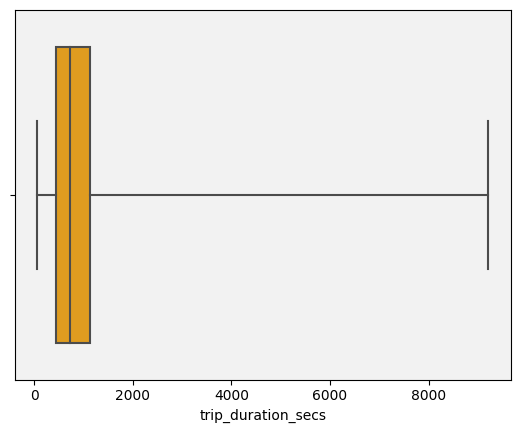

In [91]:
# total_amount
ax = plt.axes()
 
# Setting the background color of the plot
# using set_facecolor() method
ax.set_facecolor("#F2F2F2")
sns.boxplot(x = taxidf1["trip_duration_secs"], whis=15, color = 'orange')
plt.savefig('my_plot.png', transparent=True)

In [92]:
Q1 = taxidf1["trip_duration_secs"].quantile(0.25)
Q3 = taxidf1["trip_duration_secs"].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the upper and lower bounds for outlier detection
lower_bound = Q1 - 15 * IQR
upper_bound = Q3 + 15 * IQR

In [93]:
# checking for outliers above upper bound
taxidf1[taxidf1["trip_duration_secs"] > upper_bound]

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, store_and_fwd_flag, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee, PU_Borough, PU_Zone, PU_service_zone, DO_Borough, DO_Zone, DO_service_zone, trip_duration_secs, pickup_date, dropoff_date, pickup_hour, drop_hour, pickup_day, dropoff_day]
Index: []

In [94]:
# dropping extreme outliers for trip duration
taxidf1 = taxidf1[taxidf1["trip_duration_secs"] < upper_bound]

In [95]:
# final dataset size
taxidf1.shape

(132013, 32)

The final dataset size after preprocessing stage contains 1,32,013 rows and 32 columns.

<b>Five Number Summary of Variables</b>

In [98]:
# Statistical description for numerical columns
taxidf1.describe().T

count        mean         std    min     25%  \
passenger_count        132013.0    1.419943    0.905025   1.00    1.00   
trip_distance          132013.0    3.178477    4.220052   0.01    1.04   
PULocationID           132013.0  167.159704   61.984597   4.00  132.00   
DOLocationID           132013.0  166.599865   68.819510   1.00  116.00   
fare_amount            132013.0   18.155067   15.984805   3.00    9.30   
extra                  132013.0    2.753877    1.076575   0.00    2.50   
mta_tax                132013.0    0.500000    0.000000   0.50    0.50   
tip_amount             132013.0    3.578966    3.749207   0.00    1.00   
tolls_amount           132013.0    0.498085    1.898453   0.00    0.00   
improvement_surcharge  132013.0    1.000000    0.000000   1.00    1.00   
total_amount           132013.0   28.992484   20.634856   5.90   17.36   
congestion_surcharge   132013.0    2.368877    0.557331   0.00    2.50   
Airport_fee            132013.0    0.137613    0.471049   0.00    0.00   
trip_duration_secs     132013.0  930.973601  751.976508  61.00  447.00   
pickup_hour            132013.0   17.477286    1.084292  16.00   17.00   
drop_hour              132013.0   17.728542    1.133540  16.00   17.00   

                          50%      75%      max  
passenger_count          1.00     1.00     6.00  
trip_distance            1.70     2.98    39.63  
PULocationID           162.00   234.00   263.00  
DOLocationID           163.00   234.00   263.00  
fare_amount             12.80    19.80   175.00  
extra                    2.50     2.50     7.50  
mta_tax                  0.50     0.50     0.50  
tip_amount               3.02     4.55   158.00  
tolls_amount             0.00     0.00    41.71  
improvement_surcharge    1.00     1.00     1.00  
total_amount            22.20    29.88   214.17  
congestion_surcharge     2.50     2.50     2.50  
Airport_fee              0.00     0.00     1.75  
trip_duration_secs     718.00  1138.00  9213.00  
pickup_hour             17.00    18.00    19.00  
drop_hour               18.00    19.00    21.00

In [ ]:
# from the summary, we can infer that the mta_tax, improvement_surcharge columns has 0 variance. 
# Hence, it will provide no value to the model. 
# those can be removed before model building.

In [99]:
# Statistical description for categorical columns
taxidf1.describe(include=object).T

count unique                    top      freq
VendorID              132013      2                      2     97903
RatecodeID          132013.0    5.0                    1.0  126029.0
store_and_fwd_flag    132013      2                      N    131381
payment_type          132013      4                      1    107711
PU_Borough            132013      4              Manhattan    120246
PU_Zone               132013    144         Midtown Center      8625
PU_service_zone       132013      3            Yellow Zone    117984
DO_Borough            132013      6              Manhattan    122721
DO_Zone               132013    246  Upper East Side North      6812
DO_service_zone       132013      4            Yellow Zone    117388
pickup_date           132013      5             2023-04-05     28843
dropoff_date          132013      5             2023-04-05     28843
pickup_day            132013      5              Wednesday     28843
dropoff_day           132013      5              Wednesday     28843

In [100]:
taxidf1.shape

(132013, 32)

<b>Exploratory Data Analysis</b>